In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('wine_dataset.csv')
data.head()

X = data[['chlorides','total_sulfur_dioxide']]
y = data['style']

In [2]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler(feature_range=(-1,1)).fit(X).transform(X)

# Question 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Question 2

In [4]:
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV(Cs=np.logspace(-6,6,20),cv=5)
print('Score: ',logreg.fit(X_train,y_train).score(X_test,y_test))

Score:  0.9587692307692308


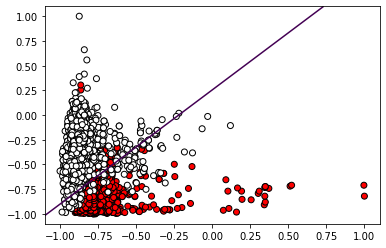

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
figure = plt.gca()
xlim = figure.get_xlim()
ylim = figure.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
P = logreg.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, P, levels=[0], alpha=1)
plt.show()

# Question 3

In [7]:
def plot_decision_boundary(predictor):
    plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
    figure = plt.gca()
    xlim = figure.get_xlim()
    ylim = figure.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    P = predictor.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, P, levels=[0], alpha=1)
    plt.show()

# Question 4

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = {'C':np.logspace(-6,6,20)}
svc = GridSearchCV(LinearSVC(),cv=5,param_grid=grid,verbose=3)
svc.fit(X_train,y_train)

Score : 0.96


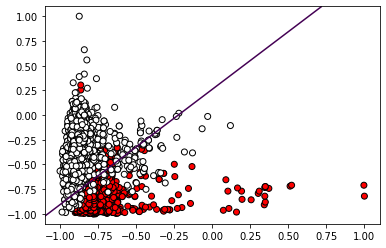

In [16]:
print('Score :',svc.score(X_test,y_test))
plot_decision_boundary(svc)

In [17]:
print(svc.best_params_)

{'C': 2.06913808111479}


In [18]:
from sklearn.svm import SVC
svcpoly = SVC(kernel='poly',C=1,coef0=1,degree=2,gamma='auto')

In [ ]:
for degree in range(2,9):
    svcpoly = SVC(kernel='poly',C=1,coef0=1,degree=degree,gamma='auto')   
    svcpoly.fit(X_train,y_train)
    plot_decision_boundary(svcpoly)

# Question 5

In [ ]:
grid={"degree": [2,3,4,5,6,7,8]}
svmpoly = GridSearchCV(SVC(kernel='poly',gamma='auto',coef0=1),param_grid=grid,cv=5,verbose=3)
svmpoly.fit(X_train,y_train)

In [21]:
print('Degré sélectionné: ',svmpoly.best_params_)
print('Score: ',svmpoly.score(X_test,y_test))

Degré sélectionné:  {'degree': 8}
Score:  0.9735384615384616
